# **Movie Genres Classification**
*Predicting the genre of movie from just 1000 characters of the script.*

*Dataset Link: https://www.kaggle.com/c/moviegenres/overview*

In [1]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/nlp project/kaggle_movie_train.csv')

In [5]:
df

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


# **Exploring the dataset**

In [4]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [6]:
df.shape

(22579, 3)

In [7]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [8]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

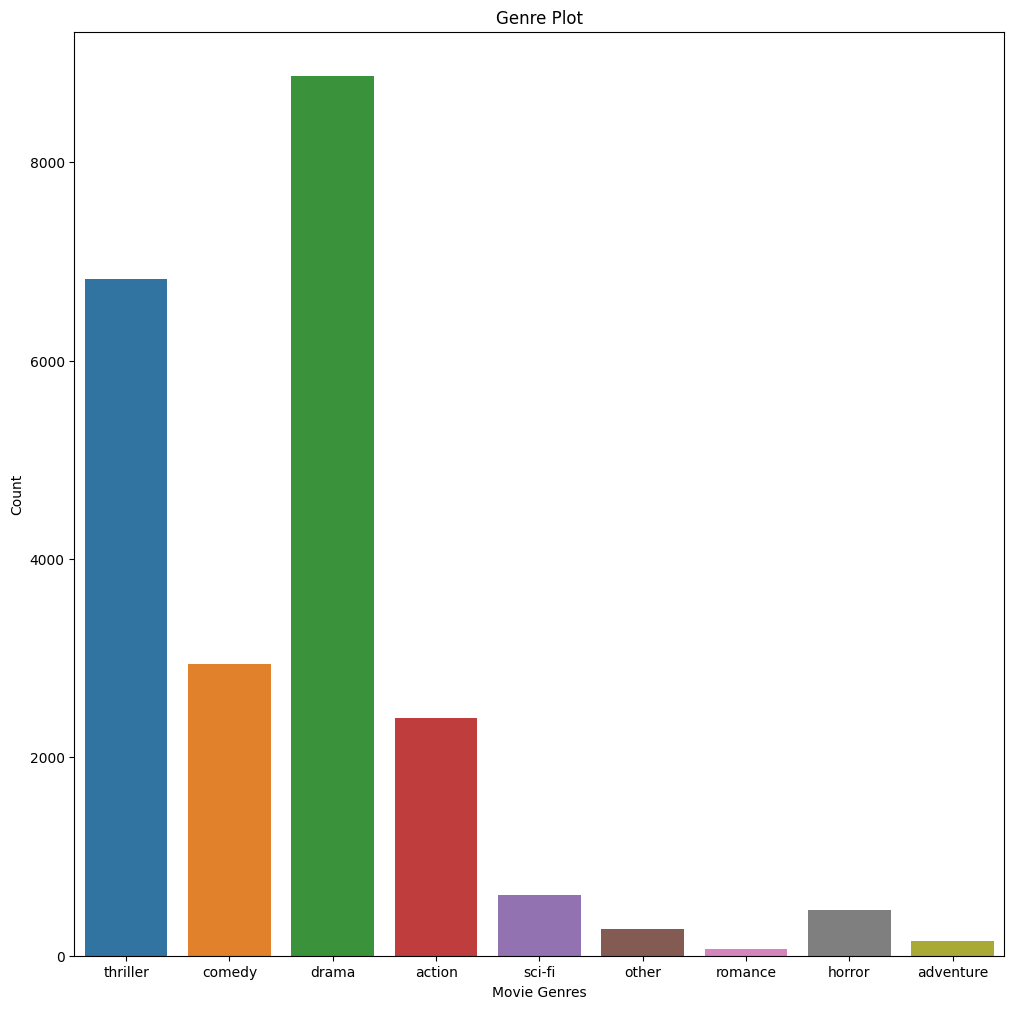

In [9]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [10]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [11]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [12]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [13]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [14]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
df.shape

(22579, 2)

In [16]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [17]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [18]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [19]:
len(corpus)

22579

In [20]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

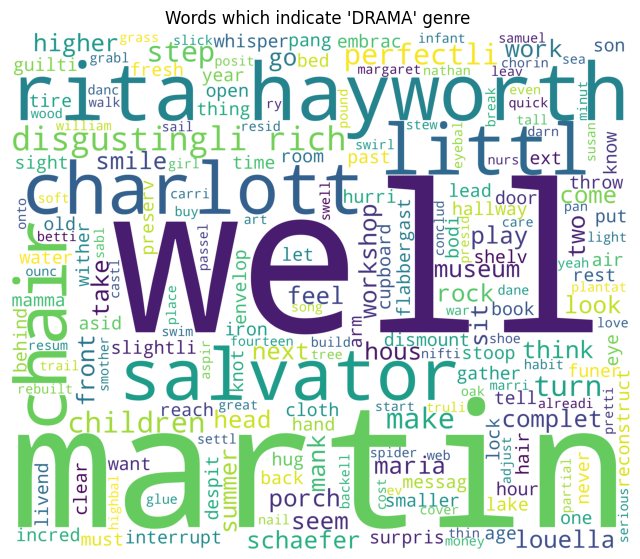

In [21]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

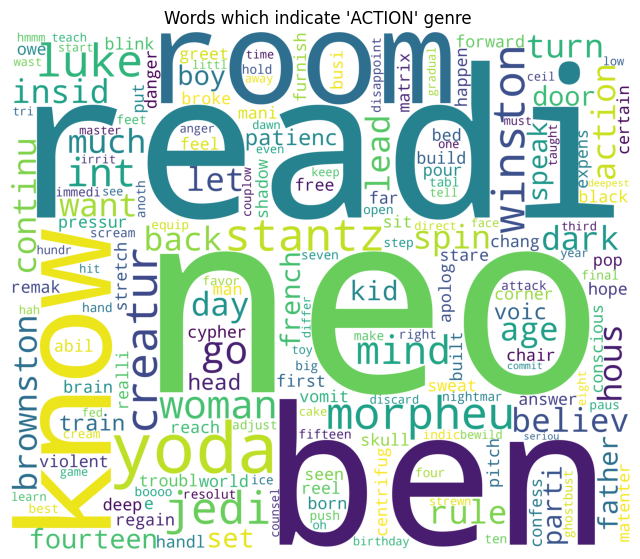

In [22]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

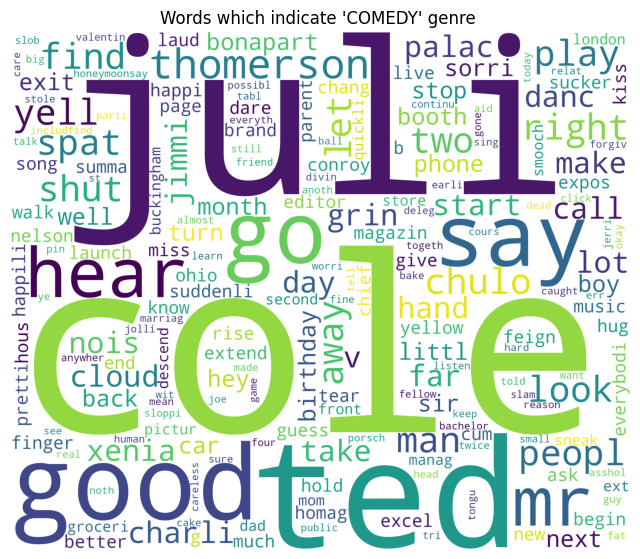

In [23]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [24]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [25]:
y = df['genre'].values

# **Model Building**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## *Multinomial Naive Bayes*

In [27]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [28]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [29]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [31]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

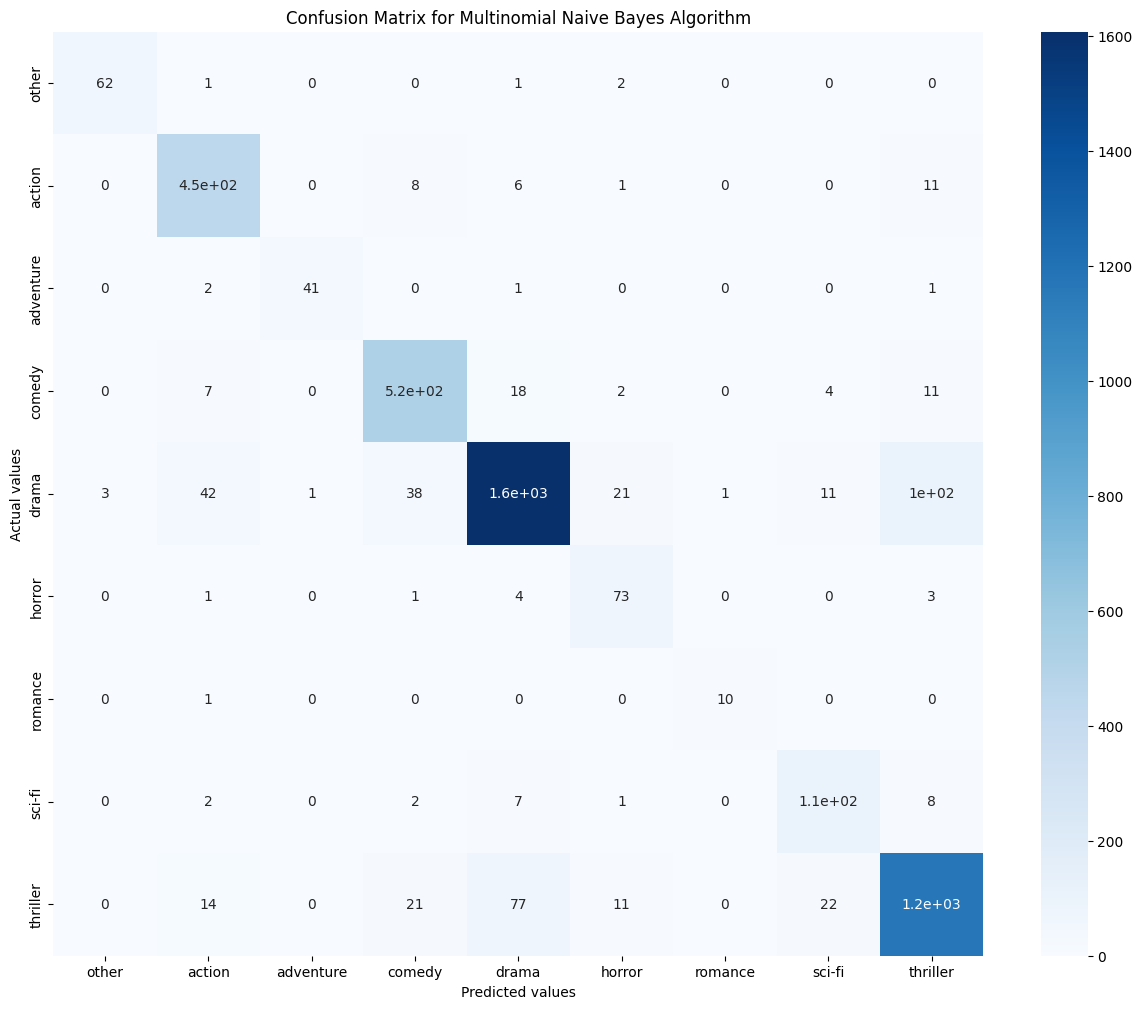

In [34]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [33]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [35]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **Predictions**

In [36]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [37]:
# For generating random integer
from random import randint

In [38]:
# Loading test dataset
test = pd.read_csv('/content/drive/MyDrive/nlp project/kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [39]:
test.shape

(5589, 2)

In [40]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [41]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ing Waterproof matches and lighters. Flashlights. Unopened packages of batteries. Sealed water bags stamped PURE FIVE YEARS FROM DATE. Tinned food. Flares. Pillows, fireproof blankets we know because the bags are stamped FIREPROOF BLANKET . A complete tool kit. As Sarah explores, she discovers something in the far wall at the end of the room, down on the floor at eye level. It's a small round portal, about eight inches across, with a four pronged cloverlike seal. The portal is closed tight, as Sarah pokes and scrapes at it idly with a finger or two, it resists her attempts to crank it open. Meg notices. MEG Hey. Relax, okay? But Sarah keeps at it, feels along the edges of the portal, then all along the wall, looking for some kind of hidden switch that controls it. MEG I mean it, lie down. You get your adrenaline up and you know what's gonna happen. Sarah stops, looks at her mother, who is pale and wan, huddled in the corner. SARAH Are you freaking out? MEG Little bit. Yeah. Sar

In [42]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: andle that later. SAAVIK My readings indicate great instability. DAVID We're not here to investigate geological aging, we're here to find life forms! His TRICORDER BLEEPS. DAVID continuing Come on... Saavik reacts to his tension with a questioning look. Then they move off. 52 INT. GRISSOM BRIDGE FAVORING ESTEBAN INTERCUT 52 WITH SAAVIK He and his officers are monitoring the progress of the landing party. DATA SOUNDS fill the bridge. Then, LT. HINES points something out on a viewscreen. ESTEBAN Grissom to landing party. We have you approaching radioactive indications. Do you concur? SAAVIK V.O. Affirmative, Captain. Our readings are well below danger level. ESTEBAN Very well. Exercise caution, Lieutenant. This landing is Captain's discretion and I'm the one who's out on a limb. SAAVIK V.O. I'll try to remember that, Captain. 53 EXT. GENESIS PLANET HIGH SHOT SPOCK'S GLADE DAY 53 David is in the lead, a distant figure, then stops to take readings as Saavik catches up to him. Then 

In [43]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: a corridor which is much better preserved. Here and there a door still hangs on its rusted hinges. An ornate piece of molding, a wall sconce... hint at the grandeur of the past. THE ROV Turns and goes through a black doorway, entering room B 52, the sitting room of a promenade suite , one of the most luxurious staterooms on Titanic. BODINE I'm in the sitting room. Heading for bedroom B 54. LOVETT Stay off the floor. Don't stir it up like you did yesterday. BODINE I'm tryin' boss. Glinting in the lights are the brass fixtures of the near perfectly preserved fireplace. An albino Galathea crab crawls over it. Nearby are the remains of a divan and a writing desk. The Dog crosses the ruins of the once elegant room toward another DOOR. It squeezes through the doorframe, scraping rust and wood chunks loose on both sides. It moves out of a cloud of rust and keeps on going. BODINE I'm crossing the bedroom. The remains of a pillared canopy bed. Broken chairs, a dresser. Through the colla

In [44]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ... in central Montana. WORF struggling Target... PICARD worried Montana... The crosshairs finally LOCK on the Borg Sphere. WORF Target locked! PICARD Fire! 42 EXT. SPACE THE BORG SPHERE 42 The quantum torpedo streaks in from off camera and slams into the Borg ship. It penetrates the Sphere as seen before... a long beat... and then it EXPLODES. 43 INT. BRIDGE 43 As everyone reacts to the destruction of the Sphere. But Picard has no time for celebration. PICARD to Data Mister Data, I want to know the exact date and time. to Riker Give me a damage report on that missile silo. DATA works Today is March second, 2063. The time in Montana is oh eight forty five. RIKER works Looks like they damaged the silo... PICARD Life signs? RIKER Can't tell. Long range bio sensors are off line. Picard thinks for a moment... makes an instant decision and turns to Worf. PICARD Worf, have Doctor Crusher, Mister La Forge and a security team meet me in Transporter Room Three. Civilian clothes. WORF Ay

In [45]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: Lou, Al, Numa and several policemen stand at the door as Clay Shaw comes to it. LOU Mr. Shaw, you're under arrest, charged with conspiracy and entering into an agreement with other persons for the specific purpose of committing the crime of murder of President John F. Kennedy in violation of... The voice dropping away as the devastated look on Shaw's face spreads, sickly, undone, his arrogant public composure gone, face now filled with terror, disbelief. LOU ...we have a warrant to search the premises. The policemen take Shaw while the D.A. staff moves into the carriage house past the butler, Frankie Jenkins. INSIDE SHAW'S HOUSE In the bedroom, Numa points out to Jim the hooks screwed into the ceiling. Al pulls out five whips, several lengths of chain, a black hood and matching black cape. Dried blood is on one whip. NUMA It's either a Mardi Gras outfit, or we got the Marquis de Sade here, chief. JIM I don't care if he was doing it with giraffes in the zoo, Numa, it's none of o